# Algoritmo de reduccion de dimension
El algoritmo LDA puede ser visto como un algotimo de la reduccion de la dimension, tomamos un vector de $R^n$ y lo transformamos a una probabilidad.

Ahora se verán 2 algoritmos para la reduccion de la dimension

In [2]:
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter

tokenizer = TreebankWordTokenizer()
docs = ["La UFRO está en Temuco, y yo estudio en la ufro."]
docs.append("La Ufro es una universidad estatal.")
docs.append("Facultad de Ingeniería y Ciencia, Ufro.")
docs.append("Departamento de Ingeniería Matemática, Ufro.")
docs.append("Departamento de Ciencias Físicas, Ufro.")
print(docs)

['La UFRO está en Temuco, y yo estudio en la ufro.', 'La Ufro es una universidad estatal.', 'Facultad de Ingeniería y Ciencia, Ufro.', 'Departamento de Ingeniería Matemática, Ufro.', 'Departamento de Ciencias Físicas, Ufro.']


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = docs
vectorizer = TfidfVectorizer(min_df=1, encoding='utf-8')
model = vectorizer.fit_transform(corpus)
X = model.todense()
print(X)
print(X.shape)
#A la matriz TF-IDF que formemos con los documentos, le llamaremos X

[[0.         0.         0.         0.         0.58946308 0.
  0.         0.29473154 0.29473154 0.         0.         0.
  0.4755751  0.         0.29473154 0.28088232 0.         0.
  0.29473154]
 [0.         0.         0.         0.         0.         0.45277275
  0.45277275 0.         0.         0.         0.         0.
  0.36529421 0.         0.         0.21574864 0.45277275 0.45277275
  0.        ]
 [0.5482859  0.         0.36719346 0.         0.         0.
  0.         0.         0.         0.5482859  0.         0.44235361
  0.         0.         0.         0.26126117 0.         0.
  0.        ]
 [0.         0.         0.38812269 0.46756681 0.         0.
  0.         0.         0.         0.         0.         0.46756681
  0.         0.57953701 0.         0.27615249 0.         0.
  0.        ]
 [0.         0.5482859  0.36719346 0.44235361 0.         0.
  0.         0.         0.         0.         0.5482859  0.
  0.         0.         0.         0.26126117 0.         0.
  0.        

Asi, de la matriz X, cada fila representa un documento y cada columna un token.

## Primer algoritmo: Descomposicion en valores singulares (SVD)

Para toda matriz $n\times n$, existen dos matrices ortogonales $U$ y $V$ y una matriz diagonal $D$, tal que $A=VDU^T$, 

Donde $D$ está compuesto por los valores singulares $\sigma_1, ..., \sigma_r$ y son las raices positivas de los autovalores no ceros, de las matrices $A^T A$ y $AA^T$, y $\sigma_{r+1}=...=\sigma_n=0$.

Las columnas de $U$ son autovectores de $A^T A$, y las columnas de $V$ son autovectores de $A A^T$

### Generalizacion para matriz no cuadrada
Para cada matriz real $m\times n$ $A$, existen dos amtrices ortogonales $U$ ($n\times n$) y $V$ ($m\times m$) y una matriz diagonal $m\times n$ $D$ tal que $A=VDU^T$.

Donde, $D$ está compuesto por los valores singulares $\sigma_1, ..., \sigma_r$, y son las raices positivas de los autovalores no ceros de $A^TA$ y $AA^T$, y $\sigma_{r+1}, ..., \sigma_p = 0$, donde $p = \min(m,n)$.

Las columnas de $U$ son autovectores de $A^T A$, y las columnas de $V$ son autovectores de $A A^T$

In [4]:
import numpy as np

#descomposicion en valores singulares = svd
V, s, Ut = np.linalg.svd(X.T)

print(V)
print(V.shape)

[[-2.13913668e-01  7.73660267e-02  4.34297183e-01 -6.68262083e-03
  -3.55558591e-01 -1.06972301e-01 -1.06972301e-01 -1.87115861e-01
  -1.87115861e-01 -2.96332552e-01  2.37060451e-01 -2.72256286e-01
  -3.88232376e-01 -4.11220965e-02 -1.87115861e-01 -2.77134669e-01
  -1.06972301e-01 -1.06972301e-01 -1.87115861e-01]
 [-2.13913668e-01  7.73660267e-02 -4.34297183e-01 -6.68262083e-03
  -3.55558591e-01 -2.69033707e-01 -2.69033707e-01  3.80563361e-02
   3.80563361e-02  2.72828084e-02 -4.12923644e-01  2.29637860e-01
  -1.55647477e-01  2.57347401e-01  3.80563361e-02 -1.53060416e-01
  -2.69033707e-01 -2.69033707e-01  3.80563361e-02]
 [-4.66404380e-01  1.75198223e-01 -1.16004375e-15 -1.74852689e-02
  -5.61312855e-02  1.65060815e-01  1.65060815e-01  1.40407693e-01
   1.40407693e-01 -4.69064690e-01 -3.03478380e-01 -3.14258000e-01
   3.59730111e-01  7.95499999e-02  1.40407693e-01 -1.17752513e-01
   1.65060815e-01  1.65060815e-01  1.40407693e-01]
 [-3.89287636e-01  1.48640802e-01 -3.50388233e-01 -1.56

A la matriz $V$ se le conoce como matriz de terminos y temas, y contiene informacion sobre los vecinos cercanos en el espacio vectorial semantico.

Esta matriz va a tener la correlacion cruzada entre los tokens basada en la coincidencia de palabras en un mismo documento.

In [8]:
D = np.zeros((len(V),len(Ut)))
np.fill_diagonal(D, s)

print(D)
print(D.shape)

[[1.3254161  0.         0.         0.         0.        ]
 [0.         1.08832291 0.         0.         0.        ]
 [0.         0.         0.89269904 0.         0.        ]
 [0.         0.         0.         0.87474214 0.        ]
 [0.         0.         0.         0.         0.70479786]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0

Finalmente la matriz $U^T$, cuyas dimensiones, son la cantidad de documentos

In [9]:
print(Ut)
print(Ut.shape)

[[-2.23524090e-01 -1.94617049e-01 -5.17110909e-01 -6.14291299e-01
  -5.17110909e-01]
 [-6.64850681e-01 -6.85951329e-01  1.53568092e-01  2.00693865e-01
   1.53568092e-01]
 [-0.00000000e+00  4.92059614e-16  7.07106781e-01  7.57002312e-15
  -7.07106781e-01]
 [ 7.12632114e-01 -7.01112089e-01 -1.06615364e-02 -1.92346622e-02
  -1.06615364e-02]
 [ 1.28849669e-02  6.06774421e-03 -4.57055227e-01  7.62888065e-01
  -4.57055227e-01]]
(5, 5)


Mostrando la diferencia entre las matrices

In [10]:
Xp = V*D*Ut
dif = X - Xp.T
print(dif.round(10))

[[ 0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.
   0.]
 [ 0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  -0.]
 [ 0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0.
   0.]
 [-0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0.
   0.]
 [-0. -0. -0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.
   0.]]


A la matriz V se le puede truncar o eliminar filas o columnas

Si $A$ es una matrix $m\times n$ de rango $r$ y sea $VDU^T=A$, la descomposicion de A. En donde se escribe, $u_i$ para las columnas de $U$, $v_i$ para las columnas de V, y $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_p$ para los valores singulares de $A$ ($p=min(m,n)$). Entonces la matriz de rango $k < r$ mas cercana a A (en la norma $|| \text{ }||_2$) esta dada por:

$$ A_k = \sum_{i=1}^k \sigma_i v_i u_i^T = V diag(\sigma_1,...,\sigma_k, 0,...,0)U^T$$
y $|| A-A_k||_2 = \sigma_{k+1}$

Y esto valida el truncar columnas

Este metodo se llama SVD truncado

Truncar la matriz V y obtener informacion de la descomposicion en valores singulares, se le llama **análisis semántico latente**

## Segundo Algoritmo: Análisis de compontentes principales (o **análisis semántico latente** o tambien PCA)
Sirve para identificar patrones en los datos y comprender la estructura de varianza y covarianza en los datos. De esta forma, se puede utilizar para reducir la dimension de los datos.

La idea basica detras de este algoritmo es que las componentes principales de una matriz X, son proyecciones no correlacionadas Y de los puntos x1 hasta xn, donde esas son nuestros vectores de documento, en algunas direcciones v (vector unitario), de tal manera que la varianza de estas componentes principales es maxima.

Definicion:

Dada una matrix $X$ $n\times d$ , de puntos de datos $X_1,...,X_n$, si $\mu$ es el centroide de $X$, entonces una **primera componente principal** de $X$ es un punto centrado $Y_1=(X-\mu)v_1$, siendo esta la proyeccion de $X_1,...,X_n$ en una direccion $v_1$ tal que var($Y_1$) esta maximizado, donde $v_1$ un vector unitario.

Mas generalmente, $Y_1,...,Y_k$, son $k$ componentes principales de $X$ a lo largo de vectores unitarios $v_1,...,v_k$, donde $1\leq k <d$, el $(k+1)th$ componente principal de $X$ es un punto centrado $Y_{k+1} = (X-\mu)v_{k+1}$, la proyeccion de $X_1,...,X_n$ en alguna direccion $v_{k+1}$, tal que var($Y_{k+1}$) es maximizada, sujeto a cov($Y_h,Y_{k+1}$)$=0$, para todo $h$ con $1 \leq h \leq k$, y donde $v_{k+1}$ es un vector unitario. Los $v_h$ se llaman direcciones principales

Teorema:

Una matrix $X$ de dimension $n\times d$ de puntos de datos $X_1, ..., X_n$, y sea $\mu$ el centroide de $X_i$'s. Si $X-\mu=VDU^T$ es una descomposicion SVD de $X-\mu$ y si la diagonal principal $D$ consiste en valores singulares $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_d$, entonces los puntos centrados $Y_1, ... , Y_d$, donde:

$$Y_k = (X- \mu)v_k = \text{columna k-esima de VD} $$
y $u_k$ es la columna k-esima de $U$, son los $d$ principales componentes de $X$.

Además,

$$\text{var}{(Y_k)}= \frac {\sigma_k^2} {n-1}$$
y
$\text{cov}(Y_h,Y_k)=0$, donde $h\neq k$ y $1\leq k, h\leq d$

Ejemplo
Se carga data de 3 dimensiones

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 6)

from sklearn.decomposition import PCA
import seaborn
from matplotlib import pyplot as plt
from nlpia.data.loaders import get_data

df = get_data('pointcloud').sample(1000)
df.shape

d:\program files\python37\lib\site-packages\pugnlp\constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
d:\program files\python37\lib\site-packages\pugnlp\constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
d:\program files\python37\lib\site-packages\pugnlp\tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
d:\program files\python37\lib\site-packages\pugnlp\util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
INFO:nlpia.constants:Sta

(1000, 3)

Visualizaremos los datos con matplotlib

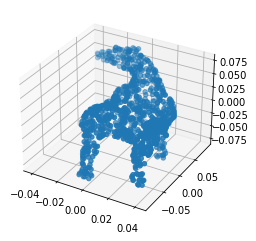

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos de prueba
x = df.iloc[:, 0]
y = df.iloc[:, 1]
z = df.iloc[:, 2]

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, marker='o')

# Mostramos el gráfico
plt.show()

Aqui se muestran los 1000 datos y aplicaremos PCA para reducir la dimension a 2 y graficarlo en el plano

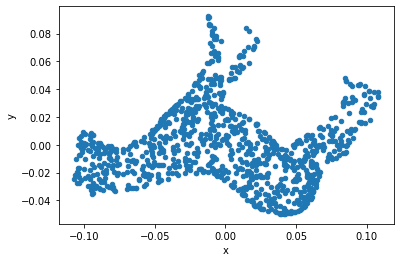

In [4]:
pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

Podemos ver que este grafico es una proyeccion de el grafico 3d de arriba, y está, es una reduccion optima, en el sentido de que la varianza es máxima.

Ahora trabajaremos otra ves con la base de datos de sms

In [5]:
import pandas as pd
from nlpia.data.loaders import get_data
pd.options.display.width = 120

sms = get_data('sms-spam')
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms.index = index
sms.head(6)


INFO:nlpia.futil:Reading CSV with `read_csv(*('d:\\program files\\python37\\lib\\site-packages\\nlpia\\data\\sms-spam.csv',), **{'nrows': None, 'low_memory': False})`...


,spam,text
sms0,0,"Go until jurong point, crazy.. Available only ..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives aro..."
sms5!,1,FreeMsg Hey there darling it's been 3 week's n...


Entonces, vectorizando

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()

In [8]:
len(tfidf.vocabulary_)#cantidad de dimensiones

9232

In [9]:
tfidf_docs = pd.DataFrame(tfidf_docs)
# X - mu
tfidf_docs = tfidf_docs - tfidf_docs.mean()
tfidf_docs.shape
#numero de documentos, numero de tokens

(4837, 9232)

In [11]:
# Hay una cantidad de spam igual a
sms.spam.sum()

638

Ahora aplicamos PCA, reduciendo las dimensiones a 16

In [12]:
pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
pca_topic_vectors = pca.transform(tfidf_docs)
#pca_topic_vectors
pca_topic_vectors.shape

(4837, 16)

Ahora bien, que quieren decir estas 16 variables?
Ese es el desafio de PCA, obtendremos combinaciones lineales de las columnas de X-mu, pero en terminos descriptivo, PCA no nos dice que obtenemos.
Hay que evaluarlo

In [13]:
columns = ['topic{}'.format(i) for i in range(pca.n_components)]
pca_topic_vectors = pd.DataFrame(pca_topic_vectors, columns=columns, index=index)
pca_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,...,topic13,topic14,topic15
sms0,0.201,0.003,0.037,...,-0.032,-0.014,-0.036
sms1,0.404,-0.094,-0.078,...,-0.020,0.046,0.051
sms2!,-0.030,-0.048,0.090,...,-0.021,-0.043,-0.051
sms3,0.329,-0.033,-0.035,...,-0.045,0.026,0.058
sms4,0.002,0.031,0.038,...,0.033,-0.086,0.015
sms5!,-0.016,0.059,0.014,...,0.078,-0.001,-0.053


Aqui llevamos nuestros valores de PCA a un dataframe, y a cada variable la llamamos como topico 0,1...15, ya que son 16 variables.

Entonces la pregunta es, cuanto aparta cada token o cada palabra, en los temas, podemos inspeccionar los pesos de cada palabra en cada topico


In [15]:
column_nums, terms = zip(*sorted(zip(tfidf.vocabulary_.values(), tfidf.vocabulary_.keys())))

In [16]:
weights = pd.DataFrame(pca.components_, columns=terms, index=['topic{}'.format(i) for i in range(16)])

pd.options.display.max_columns = 8
weights.head(6).round(3)

,!,"""",#,#150,...,…,┾,〨ud,鈥
topic0,-0.071,0.008,-0.001,-0.000,...,-0.002,0.001,0.001,0.001
topic1,0.064,0.008,0.000,-0.000,...,0.003,0.001,0.001,0.001
topic2,0.071,0.027,0.000,0.001,...,0.002,-0.001,-0.001,-0.001
topic3,-0.059,-0.032,-0.001,-0.000,...,0.001,0.001,0.001,0.001
topic4,0.381,-0.009,0.001,0.001,...,0.002,0.001,0.001,0.001
topic5,-0.265,-0.053,0.002,0.000,...,-0.003,-0.001,-0.001,-0.001


Entonces, uno al tener esa informacion, uno puede intentar hacer un análisi de qué trata el topico respecto las palabras con más peso.

In [20]:
pd.options.display.max_columns = 12
weights = pd.DataFrame(pca.components_, columns=terms, index=['topic{}'.format(i) for i in range(16)])
weights.head(6).round(3)

,!,"""",#,#150,#5000,$,...,’,“,…,┾,〨ud,鈥
topic0,-0.071,0.008,-0.001,-0.000,-0.001,0.003,...,-0.001,-0.001,-0.002,0.001,0.001,0.001
topic1,0.064,0.008,0.000,-0.000,-0.001,-0.001,...,-0.001,-0.001,0.003,0.001,0.001,0.001
topic2,0.071,0.027,0.000,0.001,0.002,0.000,...,0.000,0.001,0.002,-0.001,-0.001,-0.001
topic3,-0.059,-0.032,-0.001,-0.000,-0.001,0.001,...,-0.000,-0.000,0.001,0.001,0.001,0.001
topic4,0.381,-0.009,0.001,0.001,0.004,0.003,...,0.001,0.001,0.002,0.001,0.001,0.001
topic5,-0.265,-0.053,0.002,0.000,-0.001,-0.009,...,0.000,-0.000,-0.003,-0.001,-0.001,-0.001


In [18]:
deals = weights['! ;) :) half off free crazy deal only $ 80 %'.split()].round(3)*100
deals

,!,;),:),half,off,free,crazy,deal,only,$,80,%
topic0,-7.1,0.1,-0.5,-0.0,-0.4,-2.0,-0.0,-0.1,-2.2,0.3,-0.0,-0.0
topic1,6.4,0.0,7.4,0.1,0.4,-2.3,-0.2,-0.1,-3.8,-0.1,-0.0,-0.2
topic2,7.1,0.2,-0.1,0.0,0.3,4.4,0.1,-0.1,0.7,0.0,0.0,0.1
topic3,-5.9,-0.3,-7.1,0.2,0.3,-0.2,0.0,0.1,-2.3,0.1,-0.1,-0.3
topic4,38.1,-0.1,-12.4,-0.1,-0.2,9.9,0.1,-0.2,3.0,0.3,0.1,-0.1
topic5,-26.5,0.1,-1.6,-0.3,-0.7,-1.4,-0.6,-0.2,-1.8,-0.9,0.0,0.0
topic6,-10.9,-0.5,19.9,-0.4,-0.9,-0.6,-0.2,-0.1,-1.4,-0.0,-0.0,-0.1
topic7,15.9,0.1,-17.9,0.8,0.8,-2.7,0.0,0.0,-1.9,-0.3,0.0,-0.1
topic8,34.5,0.1,5.0,-0.4,-0.5,0.2,-0.4,-0.4,3.3,-0.6,-0.0,-0.2
topic9,7.4,-0.3,17.1,1.4,-0.9,6.3,-0.5,-0.4,3.1,-0.5,-0.0,-0.0


Dandole mensajes, es una forma de ver en que trata los topicos que creo PCA

In [19]:
deals.T.sum()

topic0    -11.9
topic1      7.6
topic2     12.7
topic3    -15.5
topic4     38.4
topic5    -33.9
topic6      4.8
topic7     -5.3
topic8     40.6
topic9     32.7
topic10   -28.8
topic11    49.2
topic12    13.7
topic13    46.7
topic14    25.2
topic15    -2.3
dtype: float64

Esto es un algoritmo de aprendizaje no supervisado, por lo que puede que los topicos no tengan mucho sentido



# Tercer Algoritmo: SVD truncado

In [21]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=16, n_iter=100)
svd_topic_vectors = svd.fit_transform(tfidf_docs.values)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors, columns=columns, index=index)

svd_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.201,0.003,0.037,0.011,-0.019,-0.053,...,0.007,-0.007,0.002,-0.036,-0.014,0.037
sms1,0.404,-0.094,-0.078,0.051,0.100,0.047,...,-0.004,0.036,0.043,-0.021,0.051,-0.042
sms2!,-0.030,-0.048,0.090,-0.067,0.091,-0.043,...,0.125,0.023,0.026,-0.020,-0.042,0.052
sms3,0.329,-0.033,-0.035,-0.016,0.052,0.056,...,0.022,0.023,0.073,-0.046,0.022,-0.070
sms4,0.002,0.031,0.038,0.034,-0.075,-0.093,...,0.028,-0.009,0.027,0.034,-0.083,-0.021
sms5!,-0.016,0.059,0.014,-0.006,0.122,-0.040,...,0.041,0.055,-0.037,0.075,-0.001,0.020


Si uno examina esta matriz, es exactamente la que dio PCA

Finalmente, calcularemos la similitud coseno, entre los SMS, dada estas 16 variables. (Recordar que aquellos con !, son spam)

In [22]:
import numpy as np

svd_topic_vectors = (svd_topic_vectors.T /np.linalg.norm(svd_topic_vectors, axis=1)).T

svd_topic_vectors.iloc[:10].dot(svd_topic_vectors.iloc[:10].T).round(1)

,sms0,sms1,sms2!,sms3,sms4,sms5!,sms6,sms7,sms8!,sms9!
sms0,1.0,0.6,-0.1,0.6,-0.0,-0.3,-0.3,-0.1,-0.3,-0.3
sms1,0.6,1.0,-0.2,0.8,-0.2,0.0,-0.2,-0.2,-0.1,-0.1
sms2!,-0.1,-0.2,1.0,-0.2,0.1,0.4,0.0,0.3,0.5,0.4
sms3,0.6,0.8,-0.2,1.0,-0.2,-0.3,-0.1,-0.3,-0.2,-0.1
sms4,-0.0,-0.2,0.1,-0.2,1.0,0.2,0.0,0.1,-0.4,-0.2
sms5!,-0.3,0.0,0.4,-0.3,0.2,1.0,-0.1,0.1,0.3,0.4
sms6,-0.3,-0.2,0.0,-0.1,0.0,-0.1,1.0,0.1,-0.2,-0.2
sms7,-0.1,-0.2,0.3,-0.3,0.1,0.1,0.1,1.0,0.1,0.4
sms8!,-0.3,-0.1,0.5,-0.2,-0.4,0.3,-0.2,0.1,1.0,0.3
sms9!,-0.3,-0.1,0.4,-0.1,-0.2,0.4,-0.2,0.4,0.3,1.0


Podemos ver que los sms *no spam* se relacionan **positivamente** con los *no spam*, los *no spam* **negativamente** con los *spam*, y los *spam* **positivamente** con los *spam*